In [37]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import folium
import branca
from branca.colormap import linear

geojson_map = dict(
    LNN = 'lnn_ime.json',
    LNS = 'lns.json',
    JL = 'jilin.json',
    HLJ = 'heilongjiang.json',
)

LNN


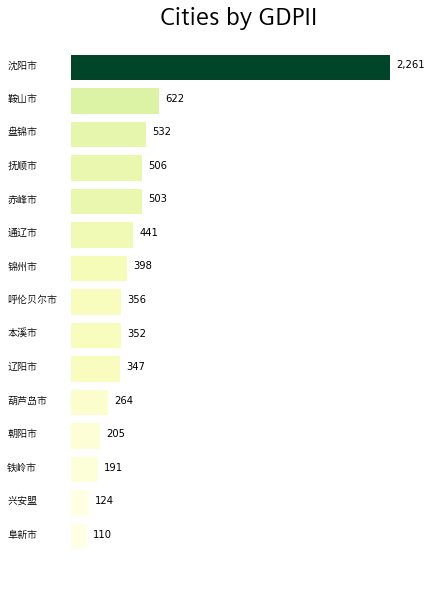

JL


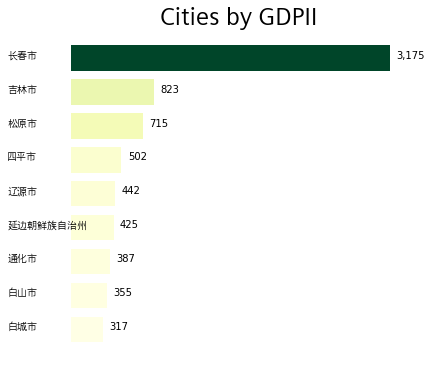

LNS


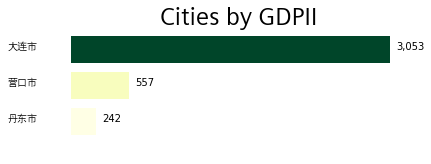

HLJ


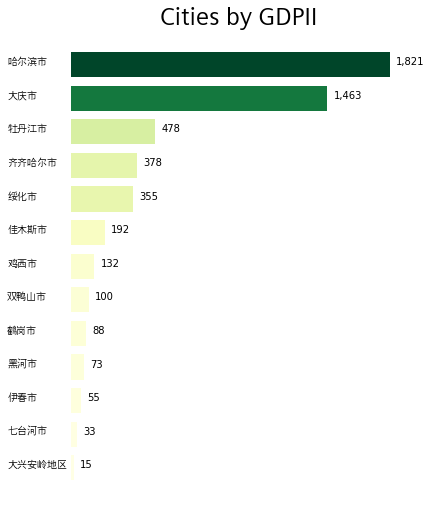

In [53]:
df = pd.read_excel("data.xlsx")
geo_path = Path("geojson")
# Create a white image of 4 pixels, and embed it in a url.
white_tile = branca.utilities.image_to_url([[1, 1], [1, 1]])
    
for territory in df.territory.unique():
    print(territory)
    df_temp = df.loc[df.territory==territory, ['city', 'gdpII']].sort_values(by='gdpII', ascending=True)
    cities = df_temp["city"].values
    values = df_temp["gdpII"].values
    scalermap = linear.YlGn_09.scale(vmin=values.min(), vmax=values.max())
    colors = [scalermap(v) for v in values]
    color_dict = {city:color for city, color in zip(cities, colors)}
    with open(geo_path / geojson_map[territory], encoding='utf-8') as f:
        geo_json_data = json.loads(f.read())
    
    m = folium.Map(tiles=white_tile, attr='white tile')
    folium.GeoJson(
        geo_json_data,
        name='city',
        style_function=lambda features: {
            'fillColor': color_dict[features['properties']['name']],
            'fillOpacity': 1,
            # lines:
            'opacity': 0.5,
            'color': 'black',
            'weight': 3,
        }
    ).add_to(m)
    
    # city markers
#     features = geo_json_data['features']
#     for city in features:
#         name, cp = city['properties']['name'], city['properties']['cp'][::-1]

#         folium.map.Marker(
#             location = cp,
#             icon=folium.features.DivIcon(
#                 icon_size=(150,36),
#                 icon_anchor=(30,10),
#                 html=f'<div style="font-size: 10pt">{name}</div>',
#                 )
#             ).add_to(m)

       
    m.fit_bounds(m.get_bounds())
    m.save(f"output/{territory}.html")
    
    gap = values.max()/50

    y = np.arange(len(values))
    fig, ax = plt.subplots(figsize=(6, len(values)/1.5))
    ax.barh(y, values, height=0.75, color=colors)
    for idx, city in enumerate(cities):
        ax.text(-gap*10, idx, city, fontproperties=prop)
        ax.text(values[idx]+gap, idx, f"{values[idx]:,.0f}")
        
    ax.set_title('Cities by GDPII', fontproperties=prop, size=25)
    ax.set_axis_off()
    plt.show()
    fig.savefig(f"output/{territory}.png", bbox_inches = 'tight',
                pad_inches=.15, dpi=150)